In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [7]:
#Read the flights
df = pd.read_csv('data/EDA_questions.csv')
df.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,2019-02-12,DL,2070,DL,N915DN,GSP,"Greer, SC",ATL,"Atlanta, GA",1020,1126,66.0,153,-3.0,0.0,0.0,0.0,0.0,0.0,-5.0
1,2019-05-25,AS,1438,AS,N844VA,LAX,"Los Angeles, CA",SJC,"San Jose, CA",2005,2130,85.0,308,53.0,16.0,0.0,0.0,0.0,37.0,53.0
2,2018-01-02,DL,2297,DL,N922DX,JAX,"Jacksonville, FL",ATL,"Atlanta, GA",1540,1658,78.0,270,-5.0,0.0,0.0,0.0,0.0,0.0,-13.0
3,2019-11-24,UA,4808,ZW,N419AW,IAD,"Washington, DC",ALB,"Albany, NY",1715,1854,99.0,325,-11.0,0.0,0.0,0.0,0.0,0.0,-33.0
4,2018-07-17,AA,1815,AA,N703UW,CLT,"Charlotte, NC",DCA,"Washington, DC",1310,1437,87.0,331,-4.0,0.0,0.0,0.0,0.0,0.0,-12.0


#### **Task 6**: How many states cover 50% of US air traffic? 

In [8]:
df= df[['fl_date', 'op_unique_carrier','origin_city_name','dest_city_name','dep_delay','arr_delay']]
df.head(2)

,fl_date,op_unique_carrier,origin_city_name,dest_city_name,dep_delay,arr_delay
0,2019-02-12,DL,"Greer, SC","Atlanta, GA",-3.0,-5.0
1,2019-05-25,AS,"Los Angeles, CA","San Jose, CA",53.0,53.0


In [9]:
df[['origin_city', 'origin_state']] = df['origin_city_name'].str.split(',', n=1, expand=True)

In [10]:
df[['dest_city', 'dest_state']] = df['dest_city_name'].str.split(',', n=1, expand=True)

In [6]:
df.head(2)

,fl_date,op_unique_carrier,origin_city_name,dest_city_name,dep_delay,arr_delay,origin_City,origin_State,dest_City,dest_State
0,2019-02-12,DL,"Greer, SC","Atlanta, GA",-3.0,-5.0,Greer,SC,Atlanta,GA
1,2019-05-25,AS,"Los Angeles, CA","San Jose, CA",53.0,53.0,Los Angeles,CA,San Jose,CA


In [35]:
dest = df.dest_state.value_counts().rename_axis('Dest_State').reset_index(name='Counts')
dest.head()

,Dest_State,Counts
0,CA,17214
1,TX,15176
2,FL,11336
3,IL,9765
4,GA,8342


In [62]:
dest_proc = (df.dest_state.value_counts() * 100 / len(df)).rename_axis('Dest_State').reset_index(name='Percentage_Dest')
dest_proc.head()

,Dest_State,Percentage_Dest
0,CA,11.023239
1,TX,9.718175
2,FL,7.259175
3,IL,6.253162
4,GA,5.341923


In [63]:
cumulative_sum = dest_proc.Percentage_Dest.cumsum()
index = cumulative_sum[cumulative_sum >= 50].index[0]
df_first_50 = dest_proc.iloc[:index+1]
df_first_50

,Dest_State,Percentage_Dest
0,CA,11.023239
1,TX,9.718175
2,FL,7.259175
3,IL,6.253162
4,GA,5.341923
5,NY,5.177349
6,NC,4.615109
7,CO,3.908146


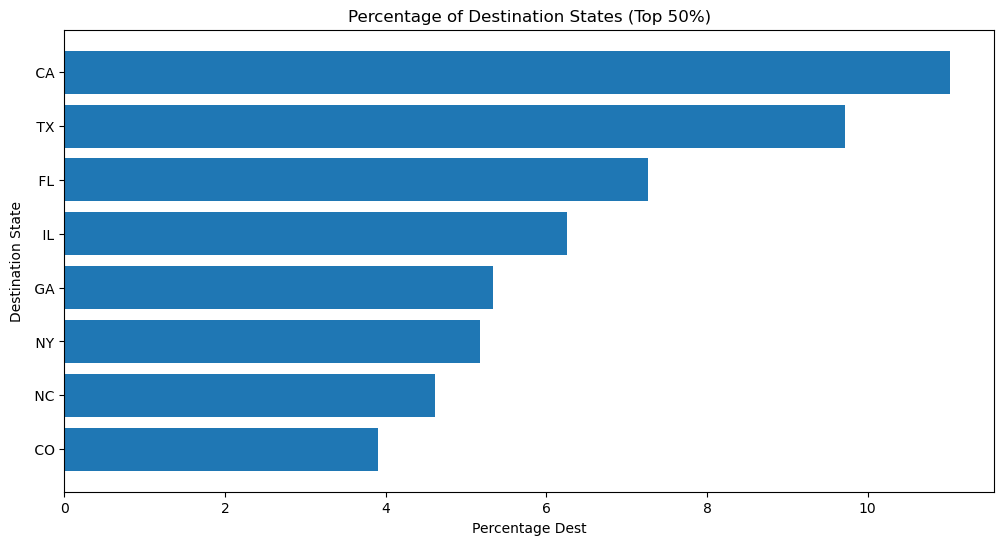

In [64]:
# Sort the DataFrame by 'Percentage' column in descending order
df_first_50_sorted = df_first_50.sort_values('Percentage_Dest', ascending=True)

# Plotting the horizontal bar graph
plt.figure(figsize=(12, 6))
plt.barh(df_first_50_sorted['Dest_State'], df_first_50_sorted['Percentage_Dest'])

# Adding labels and title
plt.xlabel('Percentage Dest')
plt.ylabel('Destination State')
plt.title('Percentage of Destination States (Top 50%)')

# Rotating y-axis labels for better visibility
plt.yticks(rotation=0)

# Displaying the plot
plt.show()

In [53]:
origin = df.origin_state.value_counts().rename_axis('Origin_State').reset_index(name='Counts')
origin.head()

,Origin_State,Counts
0,CA,17211
1,TX,15250
2,FL,11556
3,IL,9889
4,GA,8316


In [65]:
origin_proc = (df.origin_state.value_counts() * 100 / len(df)).rename_axis('Origin_State').reset_index(name='Percentage_Origin')
origin_proc.head()

,Origin_State,Percentage_Origin
0,CA,11.021318
1,TX,9.765562
2,FL,7.400055
3,IL,6.332567
4,GA,5.325273


In [66]:
cumulative_sum_orig = origin_proc.Percentage_Origin.cumsum()
index = cumulative_sum[cumulative_sum_orig >= 50].index[0]
df_first_50_orig = origin_proc.iloc[:index+1]
df_first_50_orig

,Origin_State,Percentage_Origin
0,CA,11.021318
1,TX,9.765562
2,FL,7.400055
3,IL,6.332567
4,GA,5.325273
5,NY,5.273404
6,NC,4.540826
7,CO,3.881251


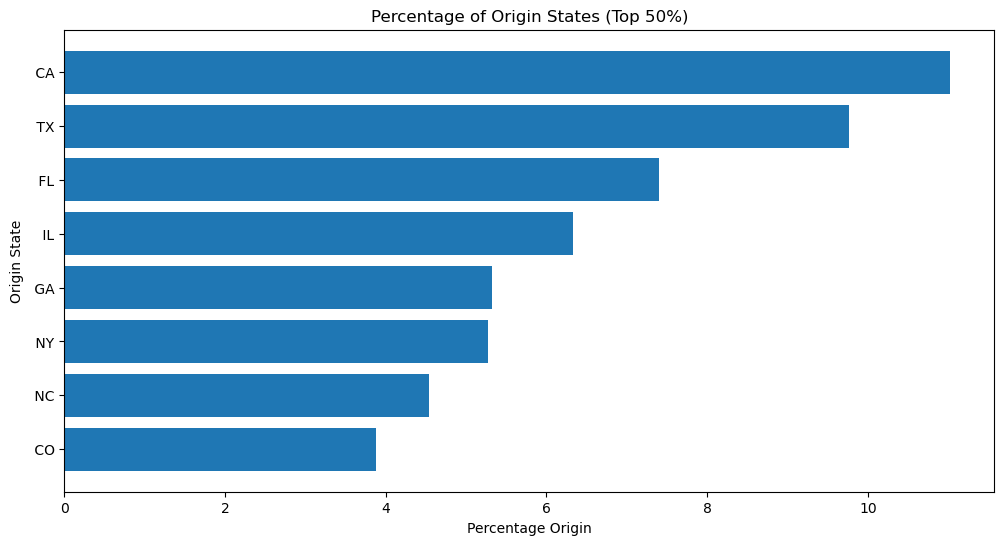

In [67]:
# Sort the DataFrame by 'Percentage' column in descending order
df_first_50_sorted = df_first_50_orig.sort_values('Percentage_Origin', ascending=True)

# Plotting the horizontal bar graph
plt.figure(figsize=(12, 6))
plt.barh(df_first_50_sorted['Origin_State'], df_first_50_sorted['Percentage_Origin'])

# Adding labels and title
plt.xlabel('Percentage Origin')
plt.ylabel('Origin State')
plt.title('Percentage of Origin States (Top 50%)')

# Rotating y-axis labels for better visibility
plt.yticks(rotation=0)

# Displaying the plot
plt.show()

In [68]:
merged_df = pd.concat([df_first_50_orig, df_first_50], axis=1)
merged_df.head()

,Origin_State,Percentage_Origin,Dest_State,Percentage_Dest
0,CA,11.021318,CA,11.023239
1,TX,9.765562,TX,9.718175
2,FL,7.400055,FL,7.259175
3,IL,6.332567,IL,6.253162
4,GA,5.325273,GA,5.341923


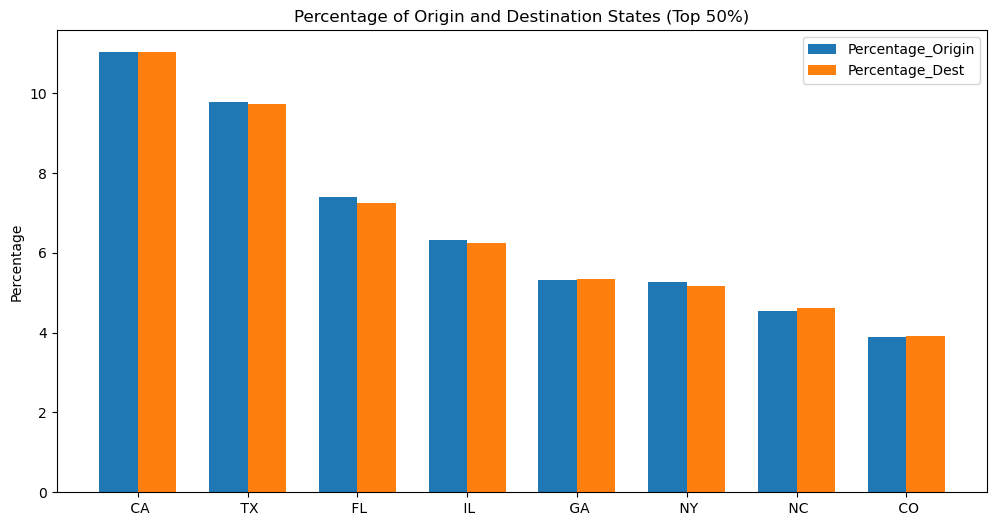

In [73]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the x-axis positions for the bars
x = np.arange(len(merged_df))

# Set the bar width
bar_width = 0.35

# Plot the bars for 'Percentage_Origin'
plt.bar(x, merged_df['Percentage_Origin'], width=bar_width, label='Percentage_Origin')

# Plot the bars for 'Percentage_Dest'
plt.bar(x + bar_width, merged_df['Percentage_Dest'], width=bar_width, label='Percentage_Dest')

# Set the x-axis tick labels
plt.xticks(x + bar_width / 2, merged_df['Origin_State'])

# Set the y-axis label
plt.ylabel('Percentage')

# Set the chart title
plt.title('Percentage of Origin and Destination States (Top 50%)')

# Add a legend
plt.legend()

# Display the plot
plt.show()